# Regresi Dummy

### Import Library

In [15]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('kapita.csv')

# Buat DataFrame
df = pd.DataFrame(data)
data.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_kelamin,pengeluaran_per_kapita,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,LAKI-LAKI,14428,RIBU RUPIAH,2018
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,PEREMPUAN,8305,RIBU RUPIAH,2018
2,3,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,LAKI-LAKI,12794,RIBU RUPIAH,2018
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,PEREMPUAN,6457,RIBU RUPIAH,2018
4,5,32,JAWA BARAT,3203,KABUPATEN CIANJUR,LAKI-LAKI,11487,RIBU RUPIAH,2018


#### Data type

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      270 non-null    int64 
 1   kode_provinsi           270 non-null    int64 
 2   nama_provinsi           270 non-null    object
 3   kode_kabupaten_kota     270 non-null    int64 
 4   nama_kabupaten_kota     270 non-null    object
 5   jenis_kelamin           270 non-null    object
 6   pengeluaran_per_kapita  270 non-null    int64 
 7   satuan                  270 non-null    object
 8   tahun                   270 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 19.1+ KB


## Linear Regression : OLS (Ordinary Least Squares)

In [16]:
# Variabel independen
X = df[['kode_provinsi', 'kode_kabupaten_kota', 'tahun']]

# Variabel dependen
y = df['pengeluaran_per_kapita']

# 4. Membuat model regresi
model = sm.OLS(y, X).fit()

# 5. Menampilkan hasil regresi
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     pengeluaran_per_kapita   R-squared:                       0.177
Model:                                OLS   Adj. R-squared:                  0.171
Method:                     Least Squares   F-statistic:                     28.71
Date:                    Sun, 29 Sep 2024   Prob (F-statistic):           5.07e-12
Time:                            02:19:02   Log-Likelihood:                -2632.3
No. Observations:                     270   AIC:                             5271.
Df Residuals:                         267   BIC:                             5281.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

#### Normalization

In [101]:
# Variabel independen
X = df[['kode_provinsi', 'kode_kabupaten_kota', 'tahun']]

# Variabel dependen
y = df['pengeluaran_per_kapita']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['kode_provinsi', 
                                    'kode_kabupaten_kota', 
                                    'tahun']])

# 4. Membuat model regresi
model = sm.OLS(y, X).fit()

# 5. Menampilkan hasil regresi
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     pengeluaran_per_kapita   R-squared:                       0.177
Model:                                OLS   Adj. R-squared:                  0.171
Method:                     Least Squares   F-statistic:                     28.71
Date:                    Sun, 29 Sep 2024   Prob (F-statistic):           5.07e-12
Time:                            01:43:38   Log-Likelihood:                -2632.3
No. Observations:                     270   AIC:                             5271.
Df Residuals:                         267   BIC:                             5281.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

#### VIF: check multikolinearitas

In [2]:
# Variabel independen
X = df[['kode_provinsi', 'kode_kabupaten_kota', 'tahun']]

# Menambahkan kolom konstanta untuk regresi
X = sm.add_constant(X)

# Menghitung VIF untuk setiap variabel independen
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF) untuk setiap variabel:")
print(vif_data)

Variance Inflation Factor (VIF) untuk setiap variabel:
               feature           VIF
0        kode_provinsi  2.050926e+06
1  kode_kabupaten_kota  1.000000e+00
2                tahun  1.000000e+00


#### Mencoba PCA

In [12]:
pca = PCA() 
principal_components = pca.fit_transform(X)

# Membuat DataFrame untuk komponen utama
pca_df = pd.DataFrame(data=principal_components, 
                      columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Menampilkan komponen utama
explained_variance = pca.explained_variance_ratio_
print(f"Proporsi Variansi yang Dijelaskan: {explained_variance}")

Proporsi Variansi yang Dijelaskan: [0.99794989 0.00205011 0.        ]


In [13]:
X_pca = sm.add_constant(pca_df)

# Menghitung VIF untuk komponen utama hasil PCA
vif_data_pca = pd.DataFrame()
vif_data_pca["feature"] = X_pca.columns
vif_data_pca["VIF"] = [variance_inflation_factor(X_pca.values, i) for i in range(X_pca.shape[1])]

print("Variance Inflation Factor (VIF) setelah PCA:")
print(vif_data_pca)

Variance Inflation Factor (VIF) setelah PCA:
  feature  VIF
0   const  1.0
1     PC1  1.0
2     PC2  1.0
3     PC3  NaN


c:\Users\calys\anaconda3\envs\home\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [14]:
# Variabel dependen
y = df['pengeluaran_per_kapita']

# 4. Membuat model regresi
model = sm.OLS(y, X_pca).fit()

# 5. Menampilkan hasil regresi
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     pengeluaran_per_kapita   R-squared:                       0.177
Model:                                OLS   Adj. R-squared:                  0.171
Method:                     Least Squares   F-statistic:                     28.71
Date:                    Sun, 29 Sep 2024   Prob (F-statistic):           5.07e-12
Time:                            02:15:58   Log-Likelihood:                -2632.3
No. Observations:                     270   AIC:                             5271.
Df Residuals:                         267   BIC:                             5281.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

c:\Users\calys\anaconda3\envs\home\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


#### Menghilangkan variabel yang memiliki VIF tinggi

In [106]:
# Variabel independen
X = df[['kode_kabupaten_kota', 'tahun']]

# Variabel dependen
y = df['pengeluaran_per_kapita']

# Membuat model regresi
model = sm.OLS(y, X).fit()

y_pred = model.predict(X)

# Menampilkan hasil regresi
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     pengeluaran_per_kapita   R-squared (uncentered):                   0.894
Model:                                OLS   Adj. R-squared (uncentered):              0.893
Method:                     Least Squares   F-statistic:                              1133.
Date:                    Sun, 29 Sep 2024   Prob (F-statistic):                   1.90e-131
Time:                            01:46:40   Log-Likelihood:                         -2632.8
No. Observations:                     270   AIC:                                      5270.
Df Residuals:                         268   BIC:                                      5277.
Df Model:                               2                                                  
Covariance Type:                nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025     

#### Metrik Evaluasi

In [107]:
# Metrik Evaluasi
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)  # squared=False untuk RMSE
mae = mean_absolute_error(y, y_pred)
mape = (abs((y - y_pred) / y)).mean() * 100  # MAPE dalam persentase

# Menampilkan Metrik
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 17267969.40
Root Mean Squared Error (RMSE): 4155.47
Mean Absolute Error (MAE): 3600.20
Mean Absolute Percentage Error (MAPE): 38.25%


c:\Users\calys\anaconda3\envs\home\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Visualisasi

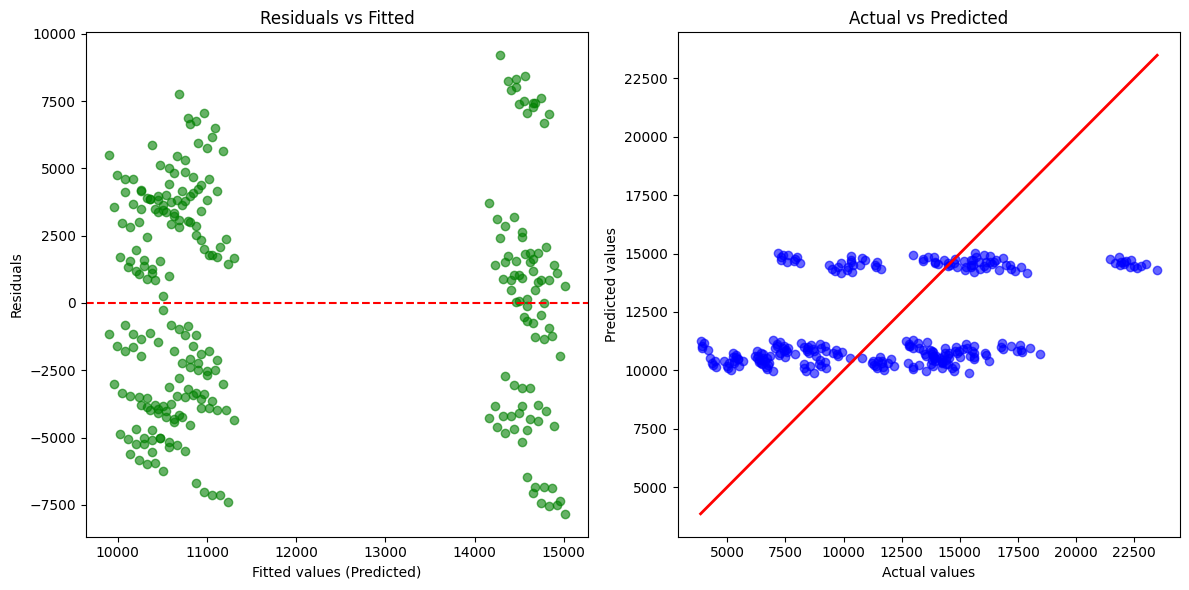

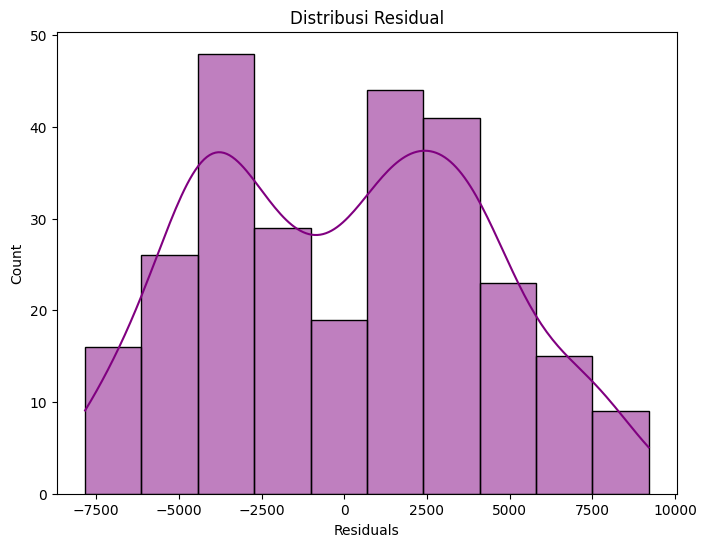

In [111]:
# Mendapatkan prediksi dan residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Visualisasi Residuals vs Fitted
plt.figure(figsize=(12, 6))

# Residuals vs Fitted
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values (Predicted)')
plt.ylabel('Residuals')

# Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.tight_layout()
plt.show()

# 8. Distribusi Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribusi Residual')
plt.xlabel('Residuals')
plt.show()

## Linear Regression with Dummy 

#### Membuat Variabel dummy berdasarkan jenis kelamin

In [90]:
dataset = pd.get_dummies(data, columns=['jenis_kelamin'], drop_first=True)
dataset.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,pengeluaran_per_kapita,satuan,tahun,jenis_kelamin_PEREMPUAN
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,14428,RIBU RUPIAH,2018,False
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,8305,RIBU RUPIAH,2018,True
2,3,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,12794,RIBU RUPIAH,2018,False
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,6457,RIBU RUPIAH,2018,True
4,5,32,JAWA BARAT,3203,KABUPATEN CIANJUR,11487,RIBU RUPIAH,2018,False


In [115]:
# mengubah tipe data
dataset['jenis_kelamin_PEREMPUAN']=dataset['jenis_kelamin_PEREMPUAN'].astype(int)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       270 non-null    int64 
 1   kode_provinsi            270 non-null    int64 
 2   nama_provinsi            270 non-null    object
 3   kode_kabupaten_kota      270 non-null    int64 
 4   nama_kabupaten_kota      270 non-null    object
 5   pengeluaran_per_kapita   270 non-null    int64 
 6   satuan                   270 non-null    object
 7   tahun                    270 non-null    int64 
 8   jenis_kelamin_PEREMPUAN  270 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 19.1+ KB


In [116]:
dataset.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,pengeluaran_per_kapita,satuan,tahun,jenis_kelamin_PEREMPUAN
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,14428,RIBU RUPIAH,2018,0
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,8305,RIBU RUPIAH,2018,1
2,3,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,12794,RIBU RUPIAH,2018,0
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,6457,RIBU RUPIAH,2018,1
4,5,32,JAWA BARAT,3203,KABUPATEN CIANJUR,11487,RIBU RUPIAH,2018,0


### OLS with Dummy

In [120]:
df = pd.DataFrame(dataset)

# Variabel independen
X = df[[ 'kode_kabupaten_kota', 'tahun', 'jenis_kelamin_PEREMPUAN']]

# Variabel dependen
y = df['pengeluaran_per_kapita']

# Membuat model regresi
model = sm.OLS(y, X).fit()

y_pred = model.predict(X)

# Menampilkan hasil regresi
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     pengeluaran_per_kapita   R-squared (uncentered):                   0.968
Model:                                OLS   Adj. R-squared (uncentered):              0.968
Method:                     Least Squares   F-statistic:                              2727.
Date:                    Sun, 29 Sep 2024   Prob (F-statistic):                   6.58e-200
Time:                            01:50:36   Log-Likelihood:                         -2469.7
No. Observations:                     270   AIC:                                      4945.
Df Residuals:                         267   BIC:                                      4956.
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025 

In [121]:
# matrik evaluasi
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)  # squared=False untuk RMSE
mae = mean_absolute_error(y, y_pred)
mape = (abs((y - y_pred) / y)).mean() * 100  # MAPE dalam persentase

# Menampilkan Metrik
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 5157687.28
Root Mean Squared Error (RMSE): 2271.05
Mean Absolute Error (MAE): 1798.94
Mean Absolute Percentage Error (MAPE): 17.15%


c:\Users\calys\anaconda3\envs\home\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


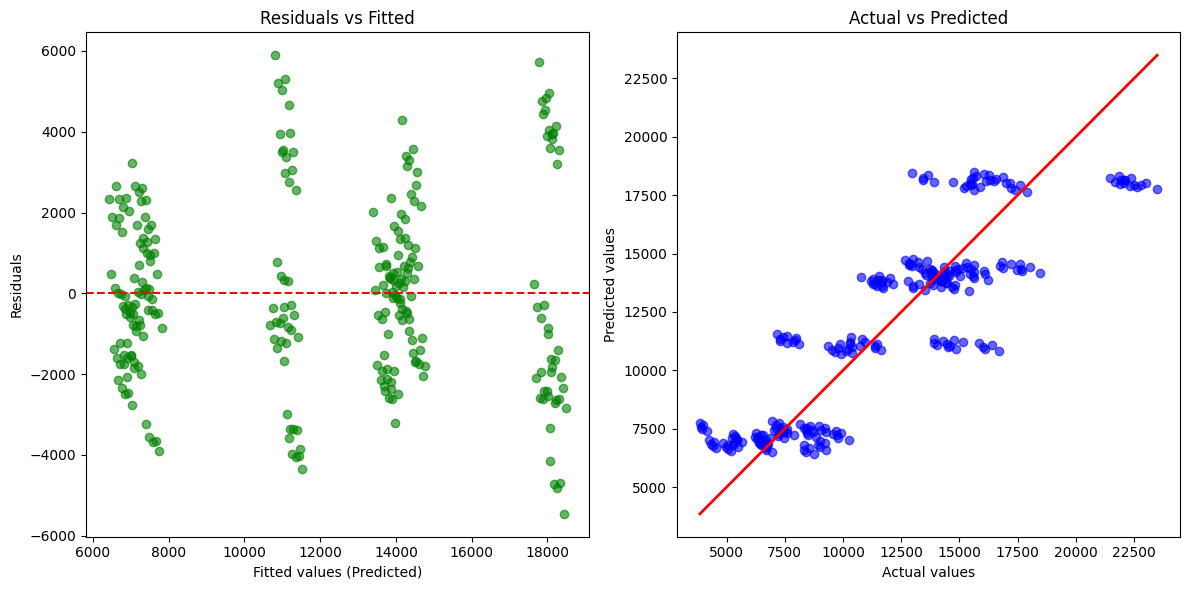

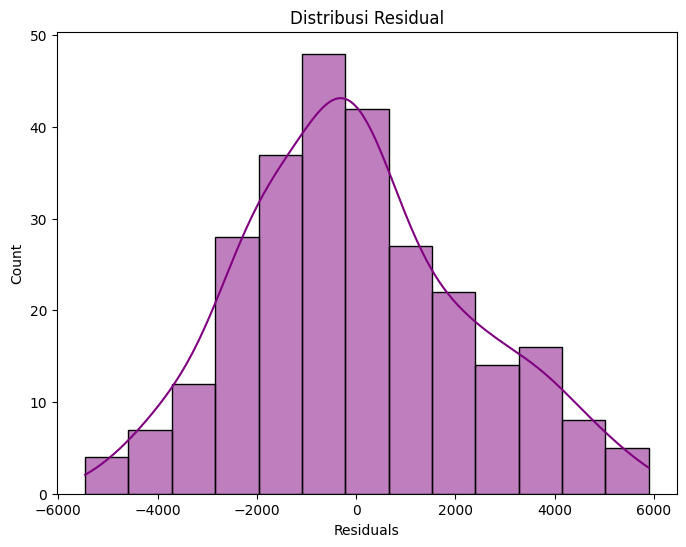

In [122]:
# Mendapatkan prediksi dan residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Visualisasi Residuals vs Fitted
plt.figure(figsize=(12, 6))

# Residuals vs Fitted
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values (Predicted)')
plt.ylabel('Residuals')

# Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.tight_layout()
plt.show()

# 8. Distribusi Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribusi Residual')
plt.xlabel('Residuals')
plt.show()

done